# Graphes et Openstreetmap

Utilisation d'openstreetmap pour construire des graphes de réseaux routiers.

Ceci permettra de trouver des chemins de longueurs minimum.

In [1]:
import osmnx as ox

On utilise la bibliothèque OSMnx qui conecte OSM et networkx. Jetez un coup d'oeil aux divers exemples founis, ils sont éclairant sur les cpacités de cette bibliothèque :

<https://github.com/gboeing/osmnx-examples/tree/main/notebooks>

In [2]:
Marseille = ox.graph.graph_from_address('Marseille, France')

la bibliothèque [osmnx](https://osmnx.readthedocs.io/) récupère d'openstreetmap le graphe des routes de Marseille (on le verra, c'est juste le centre).

Le type de graphe utilisé est un [`MultiDiGraph`](https://networkx.org/documentation/stable/reference/classes/multidigraph.html), c'est l'équivalent d'un multi-graphe mixte.

In [3]:
type(Marseille)

networkx.classes.multidigraph.MultiDiGraph

## Dessin

In [4]:
import matplotlib.pyplot as plt

### Directement

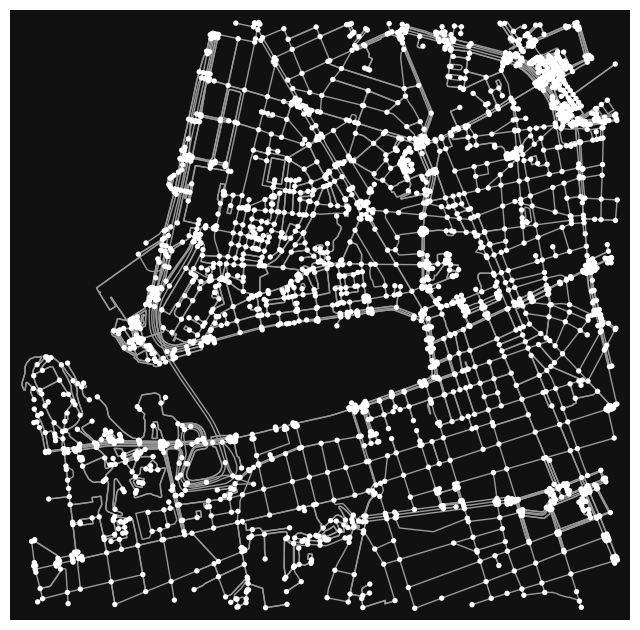

In [5]:
fig, ax = ox.plot_graph(Marseille)

plt.show()

Vous devriez voir apparaître (après un certain temps) une fenêtre avec un graphe où l'on devine le [vieux-port de Marseille](https://www.google.fr/maps/@43.2944646,5.3601266,16z).

### Avec matplotlib

On peut aussi utiliser la figure de matplotlib que l'on peut paramétrer ensite.

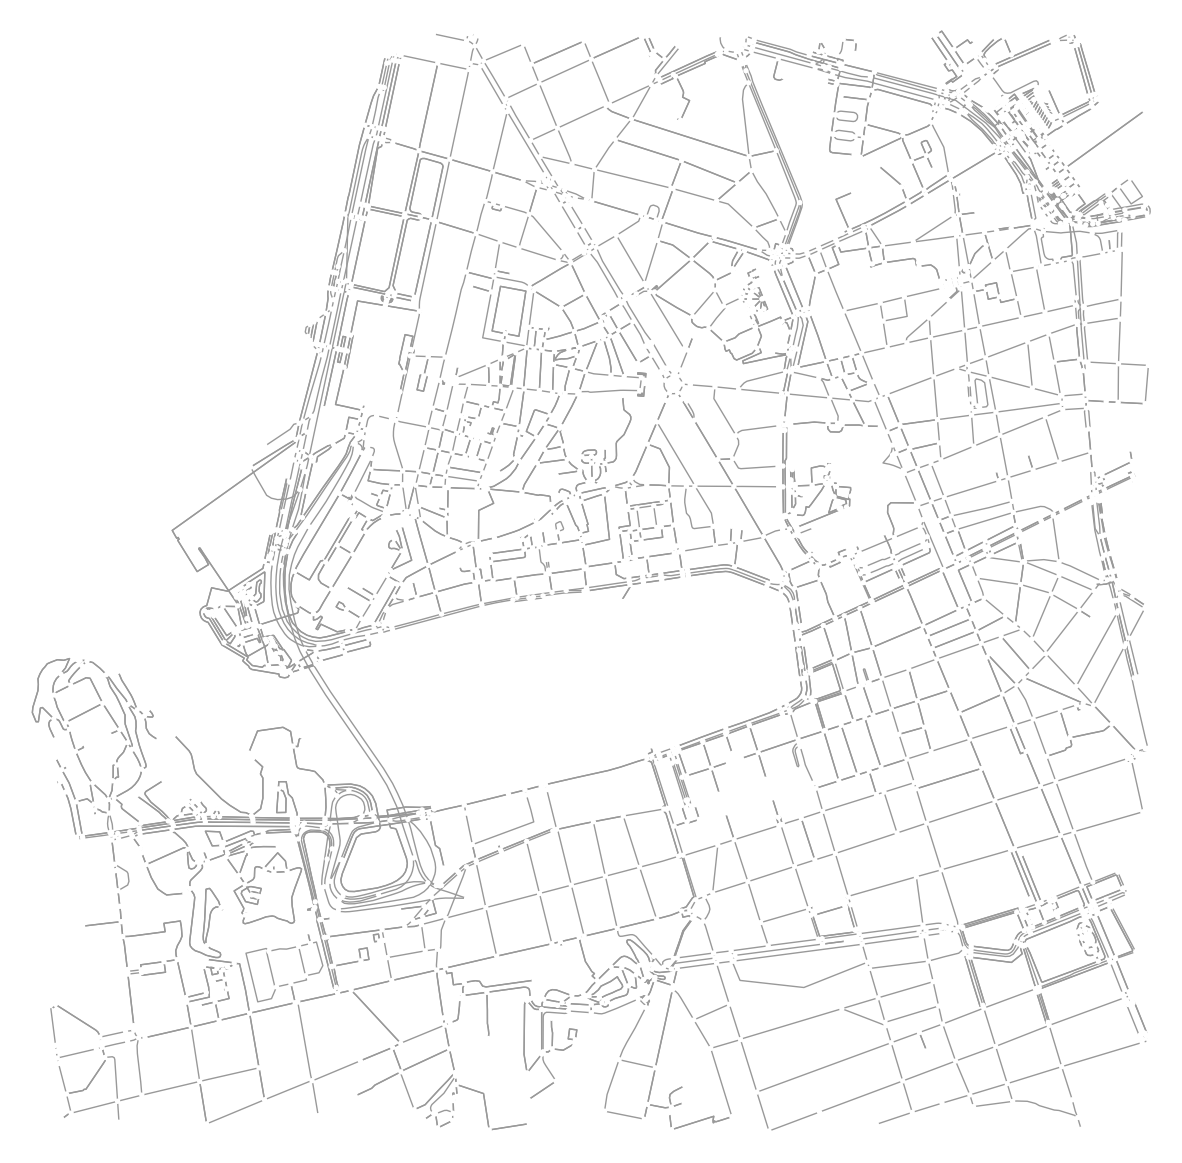

In [6]:
fig, ax = plt.subplots(figsize=(15, 15)) 

ox.plot_graph(Marseille, ax=ax)
plt.show()

## Obtenir des graphes

On peut utiliser aussi d'autres façon de récupérer des données.

### A partir d'une adresse

<https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_address>


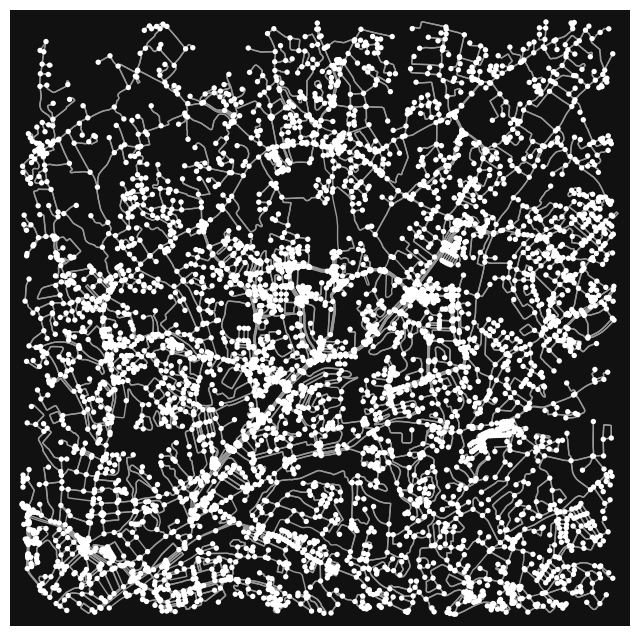

In [24]:
ecm = ox.graph.graph_from_address('Ecole centrale marseille', dist=2000)

fig, ax = ox.plot_graph(ecm)
plt.show()

Diminuons la distance pour *reconnaître* l'école.

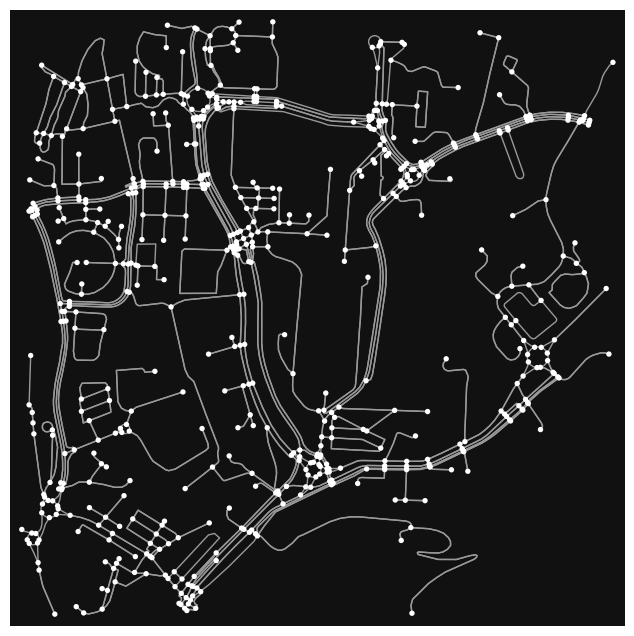

In [25]:
ecm = ox.graph.graph_from_address('Ecole centrale marseille', dist=500)

fig, ax = ox.plot_graph(ecm)
plt.show()

Notez que si l'on cherche centrale med, cela ne parche pas.

### A partir d'une boite `bbox`

<https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_bbox>

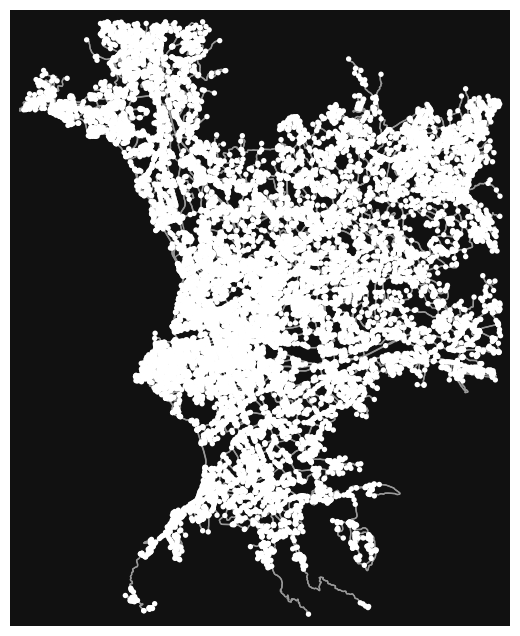

In [26]:
marseille_en_grand = ox.graph.graph_from_bbox(43.388, 43.168, 5.498, 5.295, network_type='drive')

fig, ax = ox.plot_graph(marseille_en_grand)
plt.show()

On peut utiliser <http://norbertrenner.de/osm/bbox.html> pour construire nos `bbox`. 

Faisons celle de l'école, on obtient un truc du genre : 

```
5.43466,43.33865,5.44056,43.34519(left,bottom,right,top)
```

Attention aux coordonnées, la doc nous dis que l'ordre est nord, sud, est, ouest.

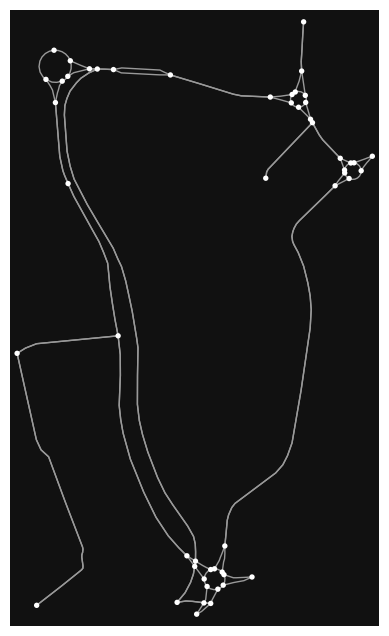

In [27]:
ecm = ox.graph.graph_from_bbox(43.34519, 43.33865, 5.44056, 5.43466, network_type='drive')

fig, ax = ox.plot_graph(ecm)
plt.show()

On a que les route. Pour voir tous les chemins, on utilise tout le réseau de routes (c'est le paramètre par défaut) :

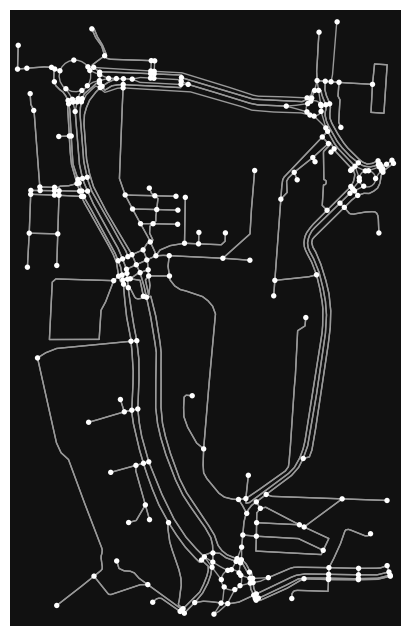

In [28]:
ecm = ox.graph.graph_from_bbox(43.34519, 43.33865, 5.44056, 5.43466)

fig, ax = ox.plot_graph(ecm)
plt.show()

### A partir de coordonnées GPS

<https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_point>


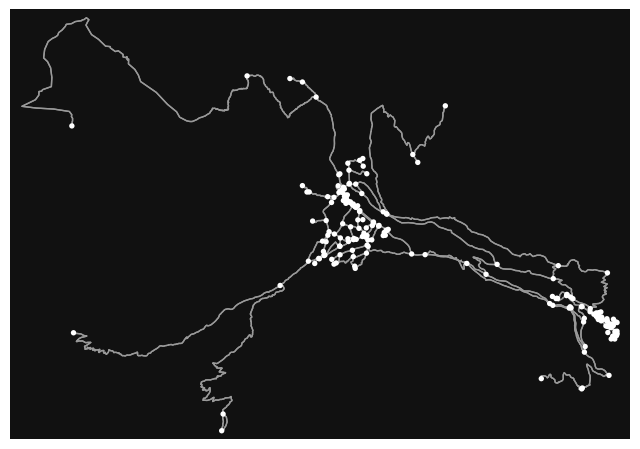

In [29]:
ailefroide = ox.graph.graph_from_point((44.8833273, 6.444307), dist=3000, network_type='all')

fig, ax = ox.plot_graph(ailefroide)
plt.show()

On peut facilement voir où c'est grace à google maps : <https://www.google.fr/maps/@44.8833273,6.444307,13z>

Les 3 paramètres sont :

1. latitude
2. longitude
3. zoom

### Données

Le graphe créé contient directement les données géographiques associées.

Sur le graphe d'Ailefroide dans un interpréteur python :

In [13]:
len(ailefroide.nodes)

189

In [14]:
len(ailefroide.edges)

453

Le graphe a 189 sommets et 453 arêtes (le 7/1/24). 

Chaque sommet est un numéro (comme `268931860`) :

In [20]:
[n for n in ailefroide.nodes][:10]  # 10 premiers sommets

[268931832,
 268931840,
 268931860,
 268931872,
 268931887,
 268931900,
 279458088,
 279458101,
 279458105,
 279458110]

In [32]:
ailefroide.nodes[268931832]

{'y': 44.8768029, 'x': 6.4787532, 'street_count': 3}

les arêtes sont des triplets `(sommet origine, sommet arrivé, numéro d'arête)`. Le numéro d'arête est par défaut 0 (c'est le cas général s'il n'y a qu'une arête par couple de sommet) :

In [22]:
[e for e in ailefroide.edges][:10]  # 10 premières arêtes

[(268931832, 6643877819, 0),
 (268931832, 8926757941, 0),
 (268931832, 6820440005, 0),
 (268931840, 8145719016, 0),
 (268931840, 6820440005, 0),
 (268931860, 8145718967, 0),
 (268931860, 2459299364, 0),
 (268931860, 2463949703, 0),
 (268931872, 2459299372, 0),
 (268931872, 2459299364, 0)]

In [33]:
ailefroide.edges[(268931832, 6643877819, 0)]

{'osmid': 30609779,
 'ref': 'D 994E',
 'name': 'Route de Pelvoux',
 'highway': 'secondary',
 'oneway': False,
 'reversed': True,
 'length': 47.576,
 'geometry': <LINESTRING (6.479 44.877, 6.479 44.877, 6.479 44.877)>}

Pour connaître le sommet associé à une coordonnée, on utilise les fonctions :

- [`get_nearest_nodes`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.distance.nearest_nodes)
- [`get_nearest_edges`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.distance.nearest_edges)

Par exemple :


In [17]:
sommet = ox.distance.nearest_nodes(ailefroide, 44.91771033167592, 6.416818457077778)
arete = ox.distance.nearest_edges(ailefroide, 44.91771033167592, 6.416818457077778)

In [47]:
sommet

8145718991

In [48]:
arete

(8119416574, 8145718991, 0)

In [18]:
ailefroide.nodes[sommet]

{'y': 44.8707699, 'x': 6.4812867, 'street_count': 3}

C'est à dire que le sommet le plus proche est aux coordonnées GPS (44.8707699, 6.4812867) et est de degré 3.

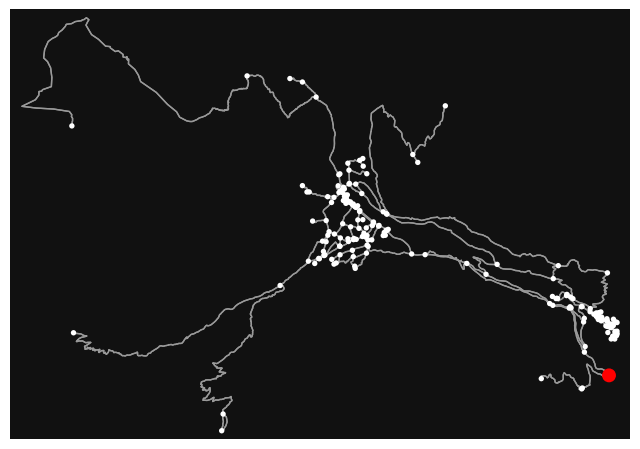

In [46]:
fig, ax = ox.plot_graph(ailefroide, 
                        node_color=["red" if n == sommet else "white" for n in ailefroide.nodes],
                        node_size=[100 if n == sommet else 15 for n in ailefroide.nodes]
                       )

plt.show()

In [34]:
ailefroide.edges[arete]

{'osmid': [871717564, 871717565],
 'highway': ['track', 'path'],
 'oneway': False,
 'reversed': True,
 'length': 617.9159999999999,
 'geometry': <LINESTRING (6.478 44.87, 6.478 44.87, 6.478 44.87, 6.478 44.87, 6.478 44.87...>}

C'est une route à double sens de 618m de longueur.

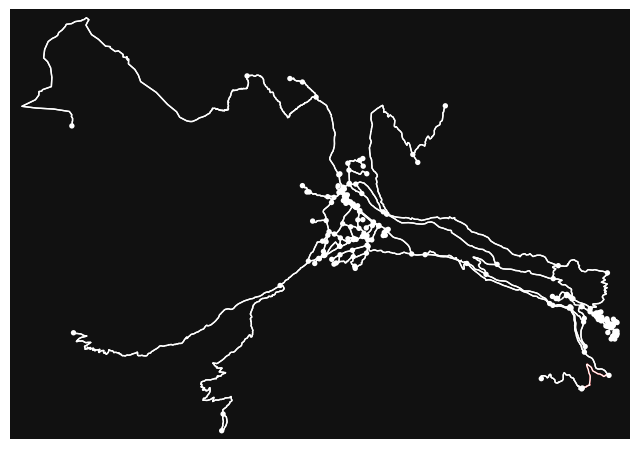

In [55]:
fig, ax = ox.plot_graph(ailefroide, 
                        edge_color=["red" if e == arete else "white" for e in ailefroide.edges],
                        edge_linewidth=[100 if e == arete else 1 for n in ailefroide.edges]
                       )

plt.show()

il doit y avoir plusieurs route qui passent par notre route et donc selon l'ordre d'affichage notre arete est en-dessous des autres. 

Utilisons une autre fonction : [`plot_graph_route`](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.plot.plot_graph_route) :

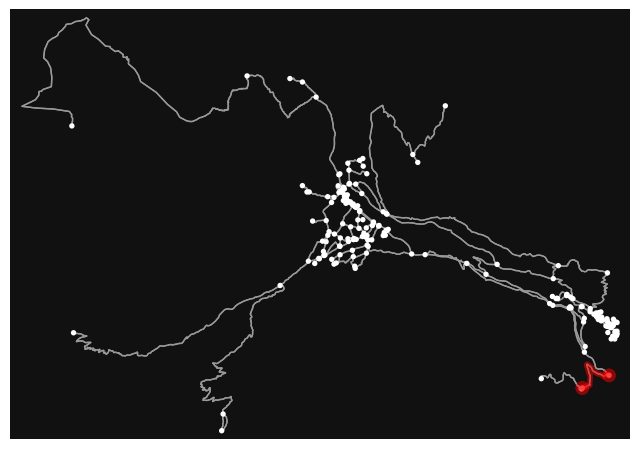

In [54]:
fig, ax = ox.plot_graph_route(ailefroide, [arete[0], arete[1]])

plt.show()

On peut mettre le réeau routier en surbrillance :

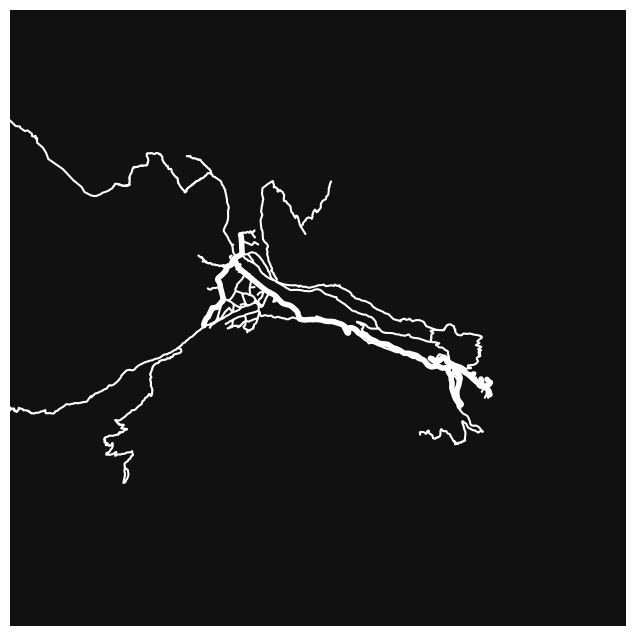

In [58]:
fig, ax = ox.plot_figure_ground(ailefroide, dist=3500)

plt.show()

## CRS

In [59]:
ailefroide.graph

{'created_date': '2024-01-07 14:10:10',
 'created_with': 'OSMnx 1.8.1',
 'crs': 'epsg:4326',
 'simplified': True}

Le CRS [epsg:4326](https://epsg.io/4326) est le crs du GPS, classique. On peut facilement en changer en utilisant [pyproj](https://pyproj4.github.io/) :

In [60]:
from pyproj import CRS

In [63]:
ailefroide_mercator = ox.projection.project_graph(ailefroide, to_crs=CRS.from_string("epsg:3785"))

Sur un si petit graphe, la forme ne change que peu :

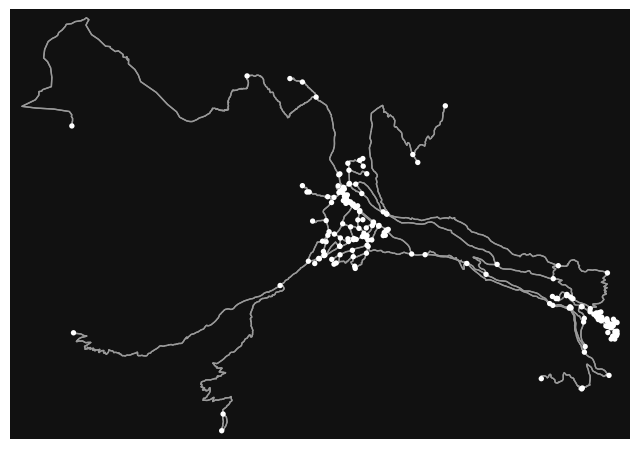

In [64]:
fig, ax = ox.plot_graph(ailefroide_mercator)

plt.show()

Mais le système de coordonnée est tout autre :

In [65]:
ailefroide.nodes[sommet]

{'y': 44.8707699, 'x': 6.4812867, 'street_count': 3}

In [66]:
ailefroide_mercator.nodes[sommet]

{'y': 5601199.7437422285,
 'x': 721493.5351292164,
 'street_count': 3,
 'lon': 6.4812867,
 'lat': 44.8707699}

## Fond de cartes

Pour ajouter un fond de carte à notre graphe il faut :

1. un fond de carte
2. s'assurer que la carte et le graphe ont le même crs
3. transformer le graphe en geodataframe
4. supperposer les deux dessins.

On utilise [contextily](https://contextily.readthedocs.io/) pour les fond de cartes (au format GPS, on a donc pas à transformer le CRS de notre graphe) :

In [67]:
import contextily as ctx

Conversion du graphe en Geodataframe :

In [68]:
ailefroide_gdf = ox.graph_to_gdfs(ailefroide, nodes=False)

In [69]:
type(ailefroide_gdf)

geopandas.geodataframe.GeoDataFrame

In [70]:
ailefroide_gdf.head()

osmid  \
u         v          key                                                      
268931832 6643877819 0                                             30609779   
          8926757941 0                                            127871454   
          6820440005 0        [835441912, 151527750, 747096237, 1186223238]   
268931840 8145719016 0                                            904701311   
          6820440005 0    [151527750, 30609775, 30609776, 835441913, 238...   

                             ref              name    highway  oneway  \
u         v          key                                                
268931832 6643877819 0    D 994E  Route de Pelvoux  secondary   False   
          8926757941 0       NaN               NaN       path   False   
          6820440005 0    D 994E               NaN  secondary   False   
268931840 8145719016 0    D 994E               NaN  secondary   False   
          6820440005 0    D 994E  Tunnel des Claux  secondary   False   

                         reversed   length  \
u         v          key                     
268931832 6643877819 0       True   47.576   
          8926757941 0      False   37.112   
          6820440005 0      False  100.357   
268931840 8145719016 0      False   39.059   
          6820440005 0       True  181.250   

                                                                   geometry  \
u         v          key                                                      
268931832 6643877819 0    LINESTRING (6.47875 44.87680, 6.47912 44.87664...   
          8926757941 0    LINESTRING (6.47875 44.87680, 6.47879 44.87683...   
          6820440005 0    LINESTRING (6.47875 44.87680, 6.47873 44.87681...   
268931840 8145719016 0      LINESTRING (6.47798 44.87618, 6.47788 44.87583)   
          6820440005 0    LINESTRING (6.47798 44.87618, 6.47799 44.87628...   

                         bridge tunnel access service  
u         v          key                               
268931832 6643877819 0      NaN    NaN    NaN     NaN  
          8926757941 0      NaN    NaN    NaN     NaN  
          6820440005 0      NaN    NaN    NaN     NaN  
268931840 8145719016 0      NaN    NaN    NaN     NaN  
          6820440005 0      yes    yes    NaN     NaN

Supperposition de la carte et du graphe. On peut utiliser plusieurs fond de cartes,  `contextily` en a [toute une liste](https://contextily.readthedocs.io/en/latest/providers_deepdive.html) (on utilise ici geoportail comme source du fond de carte).

In [82]:
import xyzservices.providers as xyz

[]

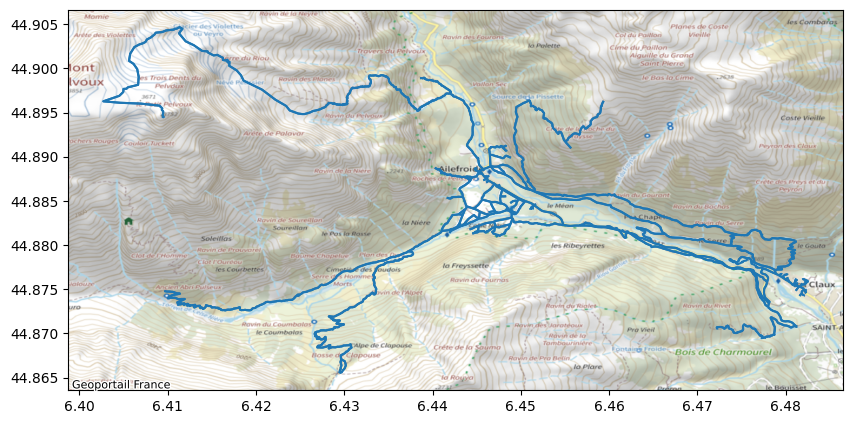

In [83]:
fig, ax = plt.subplots(figsize=(10, 10)) 


ailefroide_gdf.plot(ax=ax)
ctx.add_basemap(ax, crs=ailefroide_gdf.crs.to_string(), 
                source=xyz.GeoportailFrance.plan)

plt.plot()

Ce genre d'approche vous permer de combiner de créer des cartes très détaillées, puisque l'on peut ajouter ce que l'on veut.

## Chemins

> TBD : trouver dans marseille en grands le sommet le plus proche de l'ecm et de deep
> puis faire un chemin le plus court et l'afficher

In [ ]:
marseille_en_grand